## Name: Prashil Tumbade

## Bank note Authentication Dataset

### Source:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de) 
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de) 
Date received: August, 2012 

Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 



# Objective

> To classify whether banknote is real or fake using Machine Learning Classification Algorithms with extracted features from images using Wavelet Transform Tool.

In [1]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score,euclidean_distances
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Load the dataset to Pandas DataFrame

In [2]:
banknote_data = pd.read_csv('banknote.txt',header=None)

In [3]:
# take a look at the data
banknote_data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Descriptive Statistics

In [5]:
banknote_data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Checking for N/A values in dataset

In [6]:
banknote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
0    1372 non-null float64
1    1372 non-null float64
2    1372 non-null float64
3    1372 non-null float64
4    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


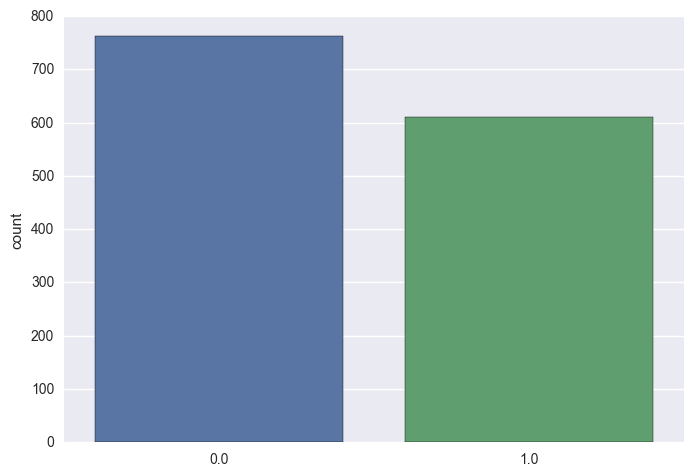

In [10]:
sns.countplot(banknote_data.values[:,-1])

Around 44% banknotes are real in the dataset

## Import the data

In [7]:
X = banknote_data.values[:,:-1]
y = banknote_data.values[:,-1]

In [8]:
banknote_data.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


## Train / Test split dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

## Clustering using KMeans

### Helper functions

In [10]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [11]:
def plot_centroids(data, labels):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    # plot the cluster
    plt.scatter(data[:,0],data[:,1], c= labels);
    plt.scatter(kmn.cluster_centers_[:,0], kmn.cluster_centers_[:,1], marker='^', c=['g'], s = 60, linewidths=2);
    plt.show()

In [12]:
def cluster_errors(model, data, labels, cluster):
    error = []
    for k in range(cluster):
        samples = data[labels == k]
        
        error.append((np.linalg.norm(samples - model.cluster_centers_[k]))**2)
        
    return sum(error)

In [13]:
def plot_Wk(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the within cluster sum of squares
    '''
    Wk = []
    for cluster in clusters:
        kmn = KMeans(n_clusters=cluster)
        kmn.fit(data)
        labels = kmn.predict(data)
        
        Wk.append(cluster_errors(kmn,data,labels,cluster))
    plt.plot(clusters, Wk)
    plt.show()

In [14]:
def plot_silhouette(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    ''' 
    score = []
    for cluster in clusters:
        kmn = KMeans(n_clusters=cluster)
        kmn.fit(data)
        labels = kmn.predict(data)
        s = silhouette_score(data, labels, metric= "euclidean")
        score.append(s)
        
    print("Best Number of Cluster: ",clusters[np.argmax(score)])
    plt.plot(clusters, score)
    plt.show()

Best Number of Cluster:  2


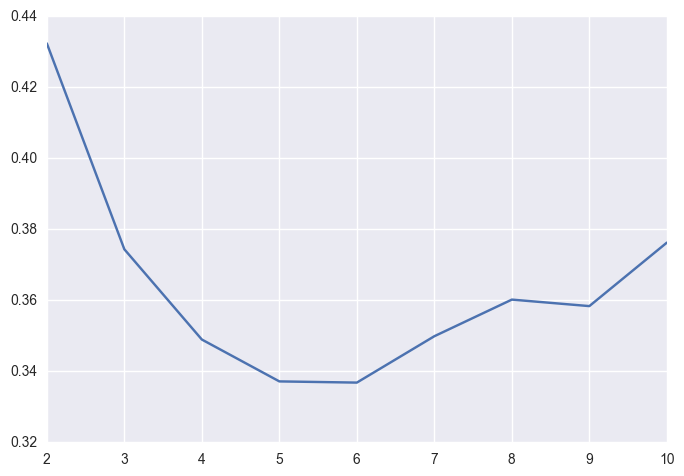

In [15]:
plot_silhouette(X,np.arange(2,11))

** From the above plot, we see best number of clusters is 2 because it gives maximum silhouette score **

In [16]:
kmn = KMeans(n_clusters=2)
kmn.fit(X_train)
labels = kmn.predict(X_test)

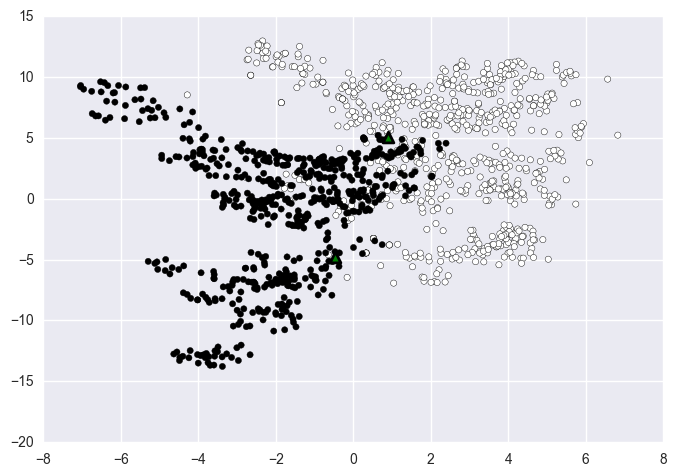

In [17]:
plot_centroids(X, y)

In [18]:
print("KMeans Training accuracy: {} ".format(accuracy_score(y_train,kmn.predict(X_train))))
print("KMeans Testing accuracy: {} ".format(accuracy_score(y_test,labels)))

KMeans Training accuracy: 0.6052871467639015 
KMeans Testing accuracy: 0.6072727272727273 


## Gaussian Mixture Clustering Model

In [27]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
labels_gmm = gmm.predict(X_test)

In [28]:
print("GMM Training accuracy: {} ".format(accuracy_score(y_train,gmm.predict(X_train))))
print("GMM Testing accuracy: {} ".format(accuracy_score(y_test,labels_gmm)))

GMM Training accuracy: 0.5396536007292616 
GMM Testing accuracy: 0.5054545454545455 


In [29]:
def plot_silhouette_GMM(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    ''' 
    score = []
    for cluster in clusters:
        gmm = GaussianMixture(n_components=cluster)
        gmm.fit(data)
        labels = gmm.predict(data)
        s = silhouette_score(data, labels, metric= "euclidean")
        score.append(s)
        
    print("Best Number of Cluster: ",clusters[np.argmax(score)])
    plt.plot(clusters, score)
    plt.show()

In [30]:
def plot_centroids_GMM(data, labels):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    gmm = GaussianMixture(n_components=len(np.unique(labels)))
    gmm.fit(data)
    # plot the cluster
    plt.scatter(data[:,0],data[:,1], c= labels);
    plt.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='^', c=['g'], s = 60, linewidths=2);
    plt.show()

Best Number of Cluster:  2


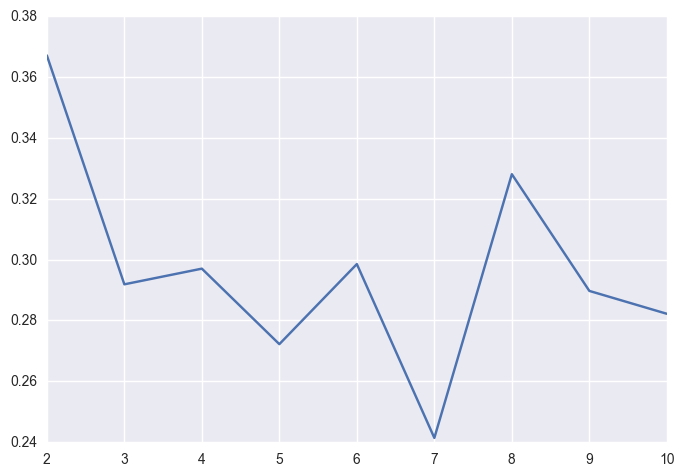

In [31]:
plot_silhouette_GMM(X,np.arange(2,11))

** From the above plot, we see best number of clusters is 2 because it give maximum silhouette score **

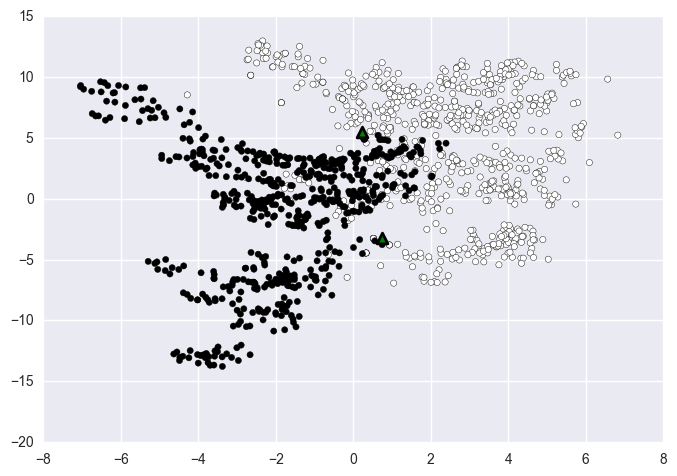

In [32]:
plot_centroids_GMM(X,y)

** From above two clustering model, Kmeans works better than GMM. As you can see both gives same optimal number of clusters to use in model, but accuracy for Kmeans is more than GMM. So Kmeans comes out to be better clustering model. **

# Classification

## Scaling the data

In [33]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## train/test split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=12)

## Using KNN to classify the models

#### Initially trying with neighbour = 5

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The training accuracy for K=5 is {}".format(accuracy_score(y_train,knn.predict(X_train))))
print("The testing accuracy for K=5 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K=5 is 0.9963547995139733
The testing accuracy for K=5 is 0.9836065573770492


## Determining best number of neighbours for KNN

In [36]:
scores = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [37]:
for i,s in enumerate(scores):
    print(i+1,s)

1 0.998178506375
2 0.998178506375
3 0.998178506375
4 0.998178506375
5 0.983606557377
6 0.985428051002
7 0.985428051002
8 0.985428051002
9 0.985428051002
10 0.985428051002
11 0.985428051002
12 0.985428051002
13 0.985428051002
14 0.985428051002
15 0.985428051002
16 0.985428051002
17 0.983606557377
18 0.985428051002
19 0.985428051002
20 0.985428051002
21 0.983606557377
22 0.983606557377
23 0.983606557377
24 0.985428051002
25 0.983606557377


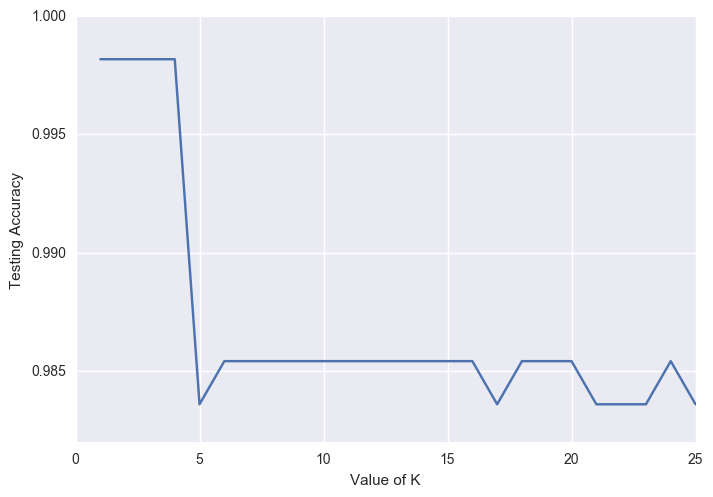

In [38]:
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

** From above plot, we find the best number of neighbours are between 1 and 4 because testing accuracy is about 99.81% for this neighbours. But we choose neighbours to be 4 because it is less complex.
**

## Fitting model best value of neighbours

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The training accuracy for K=4 is {}".format(accuracy_score(y_train,knn.predict(X_train))))
print("The testing accuracy for K=4 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K=4 is 0.9987849331713244
The testing accuracy for K=4 is 0.9981785063752276


In [40]:
from sklearn.metrics import confusion_matrix, roc_curve

### Confusion matrix

In [41]:
confusion_matrix(y_test, y_pred)

array([[300,   1],
       [  0, 248]])

### ROC curve

In [42]:
threshold = 0.4
scores = knn.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.00332226  0.02990033  1.        ] [ 1.  1.  1.  1.]


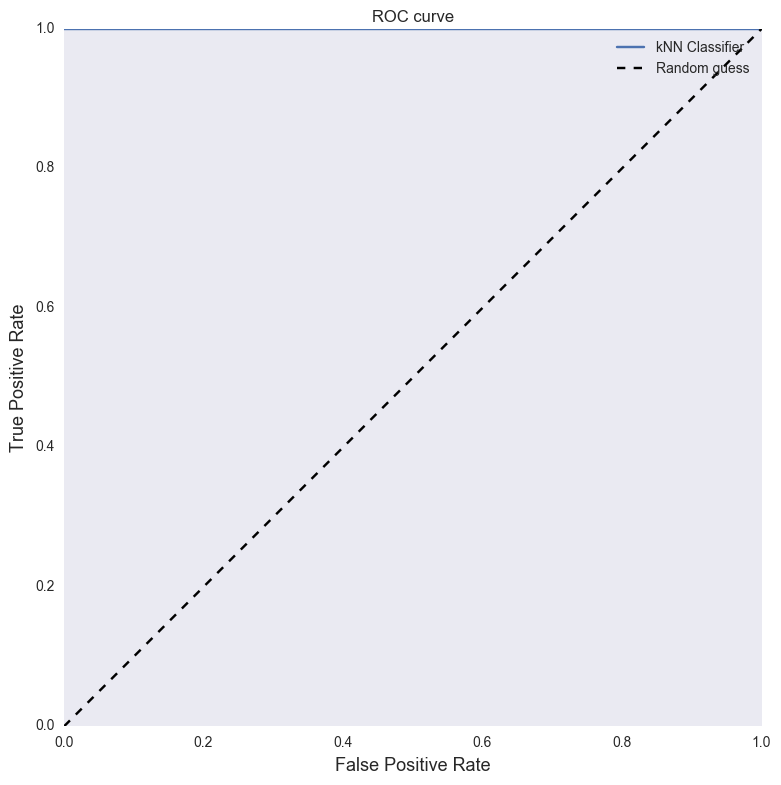

In [43]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='kNN Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

** From the above plot, you can see blue line which touches the margin which tells us our model is good **

In [44]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [46]:
print("Accuracy for Training Data is {} ".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy for Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for Training Data is 0.9878493317132442 
Accuracy for Testing Data is 0.9726775956284153 


### Confusion matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[287,  14],
       [  1, 247]])

### ROC curve

In [48]:
threshold = 0.4
scores = logreg.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.          0.00332226  0.01328904  0.0166113   0.0166113
  0.02325581  0.03322259  0.03322259  0.03654485  0.04651163  0.04651163
  0.04983389  0.06312292  1.        ] [ 0.00403226  0.98387097  0.98387097  0.98387097  0.98387097  0.99193548
  0.99193548  0.99193548  0.99596774  0.99596774  0.99596774  1.          1.
  1.          1.        ]


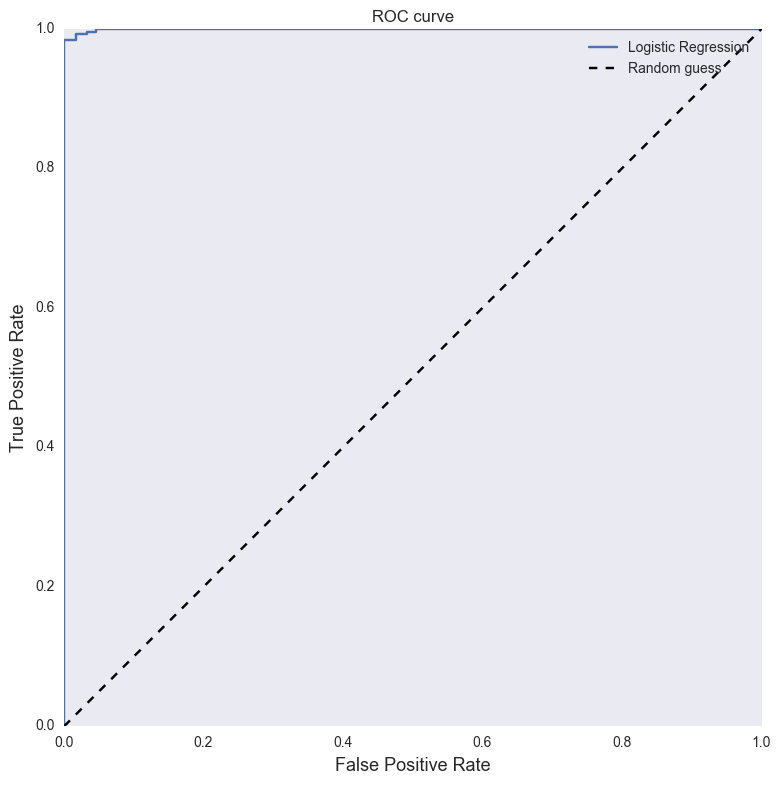

In [49]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

** From the above plot, we see the blue curve to be close to margins which tells us that our model is good. **

## DecisionTree Classifier

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Accuracy Scores

In [52]:
print("Accuracy for DecisionTreeClassifier Training Data is {} ".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy for DecisionTreeClassifier Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for DecisionTreeClassifier Training Data is 0.9878493317132442 
Accuracy for DecisionTreeClassifier Testing Data is 0.9836065573770492 


In [53]:
cross_val_score(clf, X, y, cv=10, scoring="accuracy").mean()

0.98249761980323724

## Confusion Matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[296,   5],
       [  4, 244]])

## ROC Curve

In [55]:
threshold = 0.4
scores = clf.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.         0.0166113  1.       ] [ 0.          0.98387097  1.        ]


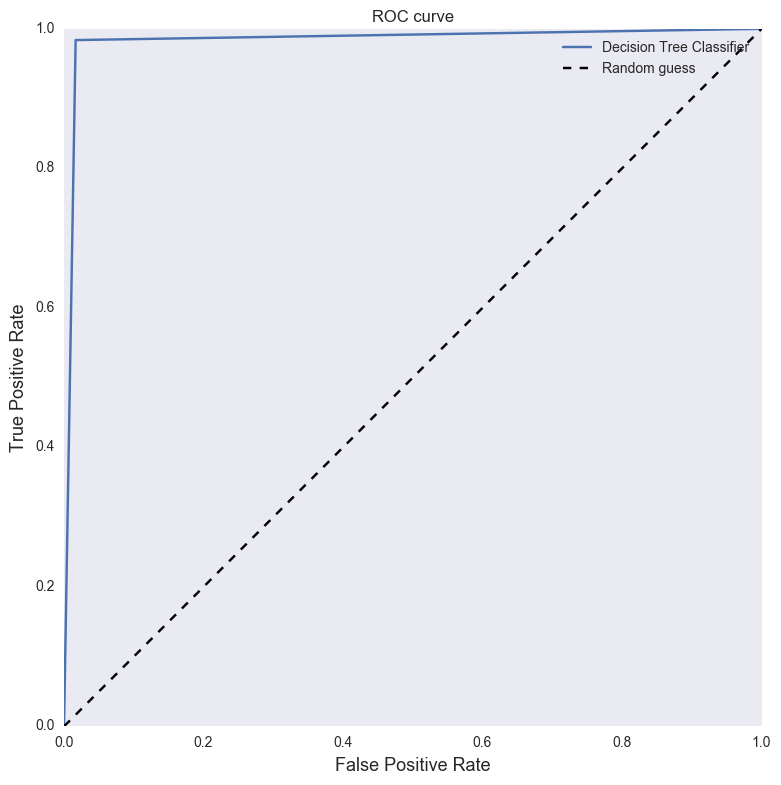

In [56]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Decision Tree Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=10000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [59]:
print("Accuracy for RandomForestClassifier Training Data is {} ".format(accuracy_score(y_train,rf.predict(X_train))))
print("Accuracy for RandomForestClassifier Testing Data is {} ".format(accuracy_score(y_test,y_pred)))

Accuracy for RandomForestClassifier Training Data is 1.0 
Accuracy for RandomForestClassifier Testing Data is 0.994535519125683 


## Gradient Boosting Classifier

In [60]:
def stage_score_plot(params, X_train, y_train, X_test, y_test):
    # instantiate the class
    clf = GradientBoostingClassifier(**params)
    # fit the model
    clf.fit(X_train, y_train)
    
    # compute train and test set deviance
    train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf.staged_predict(X_train)):
        train_score[i] = 1 - accuracy_score(y_train,y_pred)

    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = 1 - accuracy_score(y_test,y_pred)


    # plot the num_iterations and MSE for both train and test score
    plt.plot(np.arange(params['n_estimators']) + 1, train_score,
             label=" ".join(['GradientBoosting Train - learning rate',str(params['learning_rate'])]))
    plt.plot(np.arange(params['n_estimators']) + 1, test_score,
             label=" ".join(['GradientBoosting Test - learning rate',str(params['learning_rate'])]))
    
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Error')

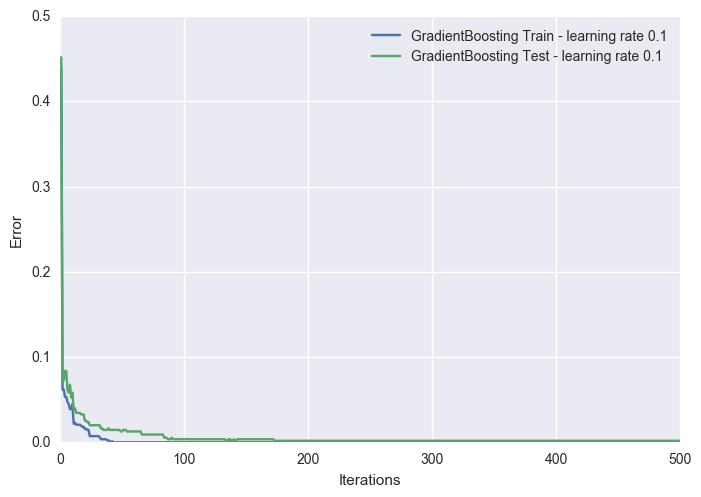

In [61]:
params = {'n_estimators': 500, 
          'learning_rate': 0.1}
stage_score_plot(params, X_train, y_train, X_test, y_test) 
plt.show()

## stage_score_plot function to make a plot that shows the error for gradient boosting with a learning rate of 0.1 and 1.

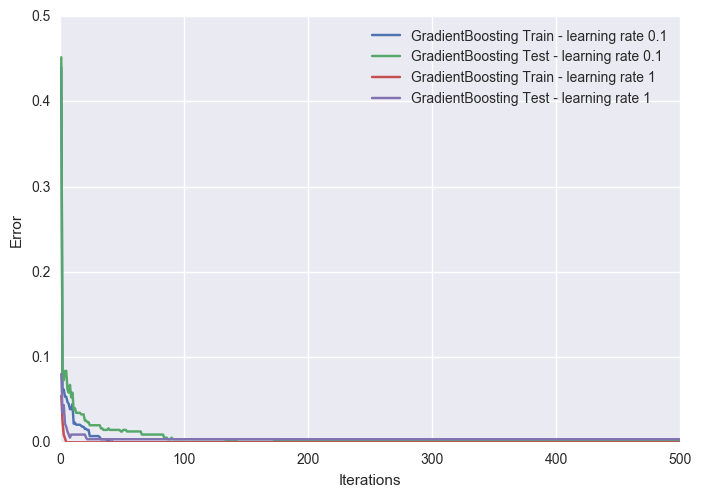

In [62]:
params_01 = {'n_estimators': 500, 
          'learning_rate': 0.1}
params_1 = {'n_estimators': 500, 
          'learning_rate': 1}
plt.figure()
stage_score_plot(params_01, X_train, y_train, X_test, y_test)    
stage_score_plot(params_1, X_train, y_train, X_test, y_test)    

plt.show()

## Use GridSearchCV for to find the best RandomForestClassifier

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1, 2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [100, 500],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 4], 'max_depth': [3, None], 'max_features': ['sqrt', 'log2', None], 'random_state': [1], 'n_estimators': [100, 500], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

### Fitting the model with best parameters obtained by GridSearchCV on RandomForestClassifier

In [65]:
print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
best_rf_model.fit(X_train,y_train)

best parameters: {'min_samples_split': 1, 'max_depth': None, 'max_features': 'sqrt', 'random_state': 1, 'n_estimators': 100, 'bootstrap': True, 'min_samples_leaf': 1}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Accuracy for RandomForestClassifier

In [66]:
print("Random Forest Testing Accuracy Score: {} ".format(best_rf_model.score(X_test,y_test)))

Random Forest Testing Accuracy Score: 0.9963570127504554 


## Confusion Matrix

In [67]:
y_pred = best_rf_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[299,   2],
       [  0, 248]])

## ROC Curve

In [68]:
threshold = 0.4
scores = best_rf_model.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.00664452  0.00664452  0.0166113   0.02990033  0.03322259  0.03986711
  0.05315615  0.0730897   0.08637874  0.09966777  0.11627907  0.12624585
  0.12956811  0.1461794   0.17607973  0.22591362  0.29900332  0.43189369
  1.        ] [ 0.45967742  0.64112903  0.72177419  0.77016129  0.83870968  0.85080645
  0.87096774  0.88709677  0.91129032  0.92741935  0.93951613  0.94354839
  0.96774194  0.99193548  0.99193548  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]


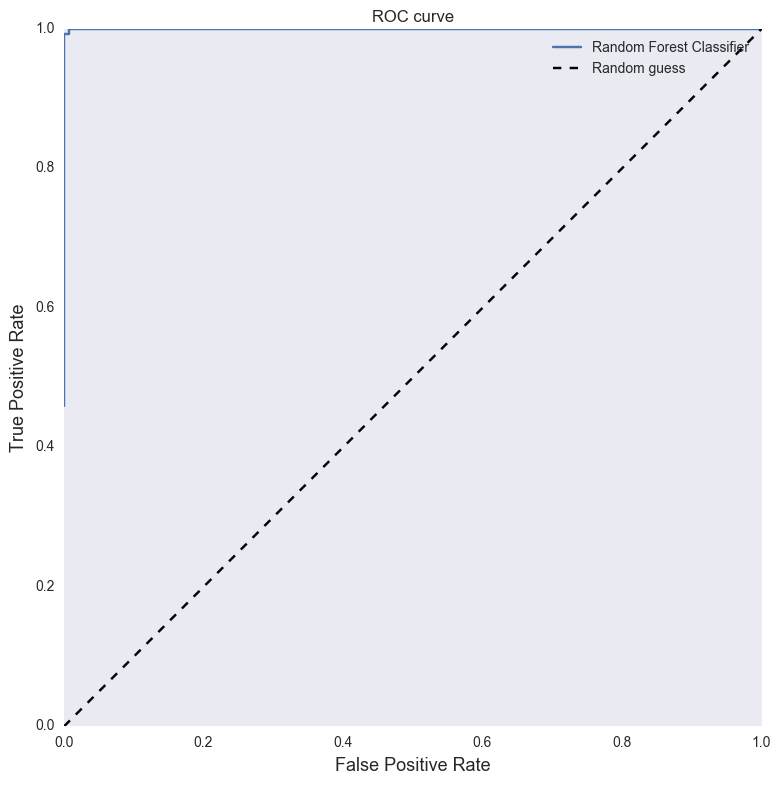

In [69]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

## Use GridSearchCV for to find the best GradientBoostRegressor

In [70]:
gradient_boost_grid = {'learning_rate':[0.05, 0.02, 0.01],
                       'max_depth':[4, 5, 6, 7],
                       'min_samples_leaf':[7, 9, 13],
                       'max_features':['auto'],
                       'n_estimators':[100,500]}

gradient_boost_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
gradient_boost_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   35.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto'], 'n_estimators': [100, 500], 'max_depth': [4, 5, 6, 7], 'min_samples_leaf': [7, 9, 13], 'learning_rate': [0.05, 0.02, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

### Fitting the model with best parameters obtained by GridSearchCV on GradientBoostingClassifier

In [71]:
print("best parameters:", gradient_boost_gridsearch.best_params_)

best_gradient_boost_model = gradient_boost_gridsearch.best_estimator_
best_gradient_boost_model.fit(X_train,y_train)

best parameters: {'max_features': 'auto', 'n_estimators': 500, 'max_depth': 6, 'min_samples_leaf': 13, 'learning_rate': 0.02}


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=6,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=13,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

## Accuracy for GradientBoostingClassifier

In [72]:
print("Gradient Boosting Accuracy Score: {} ".format(best_gradient_boost_model.score(X_test,y_test)))

Gradient Boosting Accuracy Score: 0.9908925318761385 


## Confusion Matrix

In [73]:
y_pred = best_gradient_boost_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[299,   2],
       [  3, 245]])

## ROC Curve

In [74]:
threshold = 0.4
scores = best_gradient_boost_model.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00332226  0.00332226  0.00996678  0.00996678  0.0166113   0.02990033
  0.04983389  0.06312292  0.10963455  0.11627907  0.12956811  0.14285714
  0.1627907   0.16943522  0.19269103  0.20598007  0.25249169  0.25913621
  0.28571429  0.2923588   0.29900332  0.31229236  0.36877076  0.37541528
  0.3986711   0.40531561  0.42857143  0.43521595  0.44850498  0.4551495
  0.45847176  0.46511628  0.5714

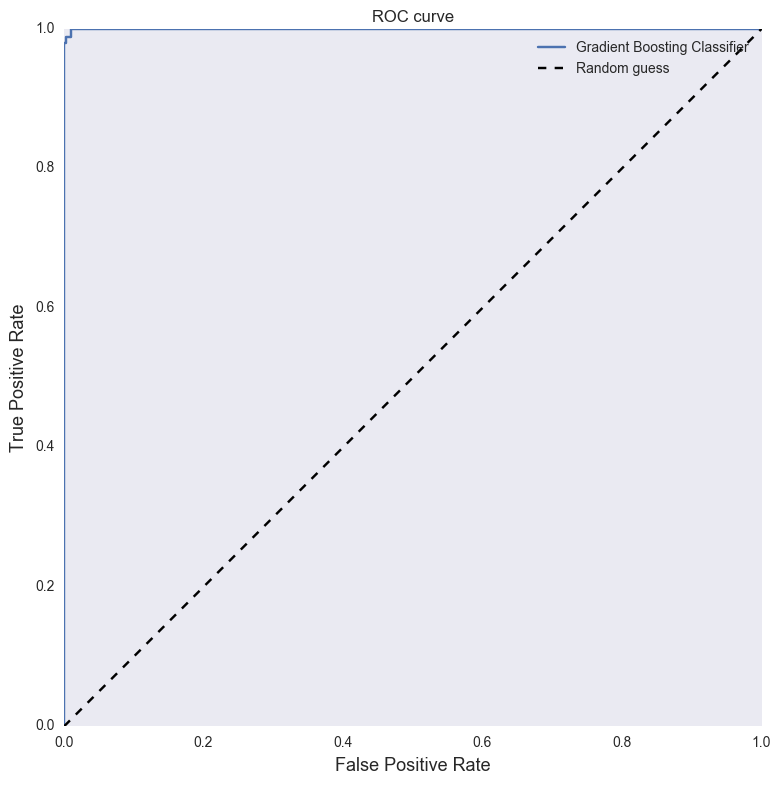

In [75]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Gradient Boosting Classifier')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

### From above ensemble methods, we see that GradientBoostingClassifer gives us better accuracy results than RandomForestClassifier and DecisionTreeClassifier

## Naive Bayes Classifier

In [76]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

## Bernoulli Naive Bayes

In [77]:
sk_bb = BernoulliNB()
sk_bb.fit(X_train,y_train)
acc = cross_val_score(sk_bb, X, y, cv=10, scoring="accuracy")
print("Bernoulli Accuracy: ", np.mean(acc))

Bernoulli Accuracy:  0.844007193484


## Confusion Matrix

In [78]:
y_pred = sk_bb.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[244,  57],
       [ 26, 222]])

## ROC Curve

In [79]:
threshold = 0.4
scores = sk_bb.predict_proba(X_test)[:,1]
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.00664452  0.04318937  0.04318937  0.05647841  0.10963455
  0.12292359  0.17940199  0.18936877  0.19269103  0.45182724  0.51827243
  0.52159468  0.56478405  0.77740864  1.        ] [ 0.          0.06451613  0.41129032  0.43548387  0.61693548  0.61693548
  0.61693548  0.85887097  0.89516129  0.89516129  0.89919355  0.9233871
  0.9233871   0.9233871   0.98790323  1.        ]


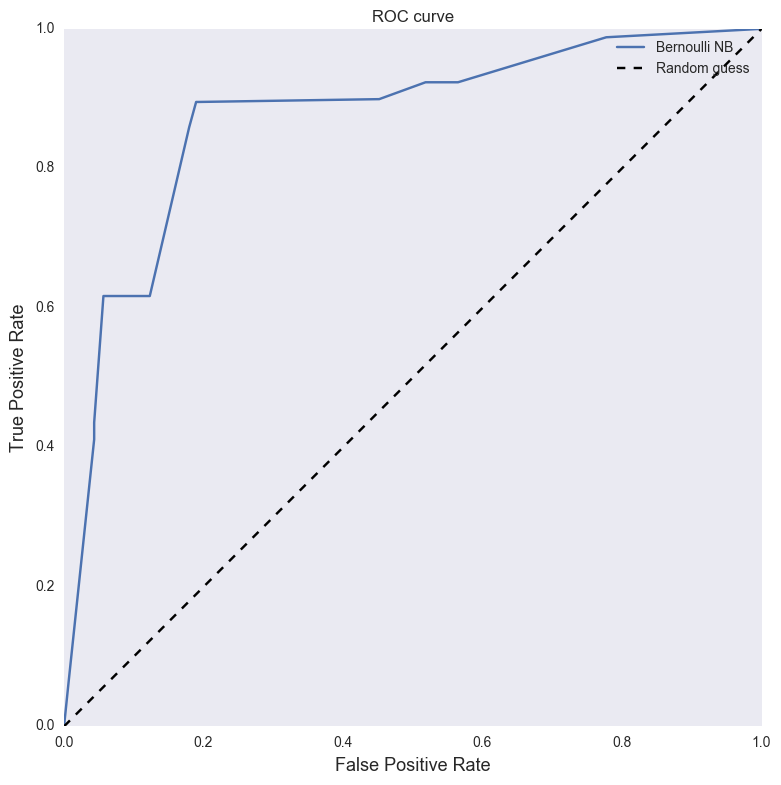

In [80]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Bernoulli NB')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

## SVM Classifier

In [81]:
## helper functions

In [82]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [83]:
from sklearn.svm import SVC

In [84]:
X_train = X_train[:,:2]
X_test = X_test[:,:2]
SVM = SVC()
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
accuracy_score(SVM.predict(X_test),y_test)

0.91256830601092898

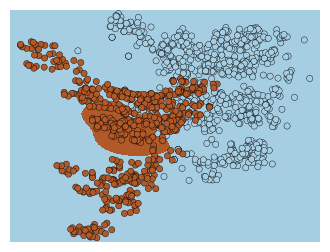

In [86]:
decision_boundary(SVM, X[:,:2],y)

## Using GridSearchCV to find best parameters for SVC

In [87]:
svm_grid = {'kernel':['rbf','poly','linear'],
                       'C':[4, 5, 6,10],
                       'gamma':['auto']}

svm_gridsearch = GridSearchCV(SVC(),
                             svm_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
svm_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'poly', 'linear'], 'C': [4, 5, 6, 10], 'gamma': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [88]:
print("best parameters:", svm_gridsearch.best_params_)

best_svm_model = svm_gridsearch.best_estimator_
best_svm_model.fit(X_train,y_train)

best parameters: {'kernel': 'rbf', 'C': 6, 'gamma': 'auto'}


SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
accuracy_score(best_svm_model.predict(X_test),y_test)

0.93078324225865205

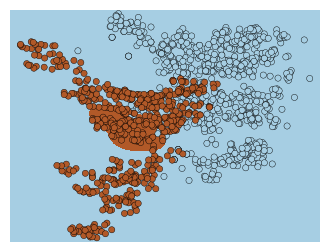

In [90]:
decision_boundary(best_svm_model,X[:,:2],y)

## Confusion Matrix

In [91]:
y_pred = best_svm_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[268,  33],
       [  5, 243]])

## ROC Curve

In [92]:
threshold = 0.4
scores = best_svm_model.decision_function(X_test)
fpr,tpr, threshold = roc_curve(y_test,scores,pos_label=1)
print(fpr,tpr)

[ 0.          0.          0.00332226  0.00332226  0.00664452  0.00664452
  0.00996678  0.00996678  0.01328904  0.01328904  0.0166113   0.0166113
  0.01993355  0.01993355  0.02990033  0.03322259  0.03322259  0.03654485
  0.03654485  0.03986711  0.03986711  0.04318937  0.04318937  0.04651163
  0.04651163  0.04983389  0.04983389  0.05315615  0.05315615  0.05647841
  0.05647841  0.06644518  0.06976744  0.06976744  0.07973422  0.07973422
  0.08305648  0.08305648  0.09634551  0.09634551  0.10631229  0.10631229
  0.10963455  0.10963455  0.12956811  0.13953488  0.1461794   0.1461794
  0.15282392  0.15282392  0.15946844  0.15946844  0.16943522  0.16943522
  0.19269103  0.19933555  0.22259136  0.22259136  0.26578073  0.27242525
  1.        ] [ 0.00403226  0.33064516  0.33064516  0.33870968  0.33870968  0.35887097
  0.35887097  0.47580645  0.47580645  0.49193548  0.49193548  0.52016129
  0.52016129  0.64919355  0.64919355  0.64919355  0.68548387  0.68548387
  0.7016129   0.7016129   0.72580645  0

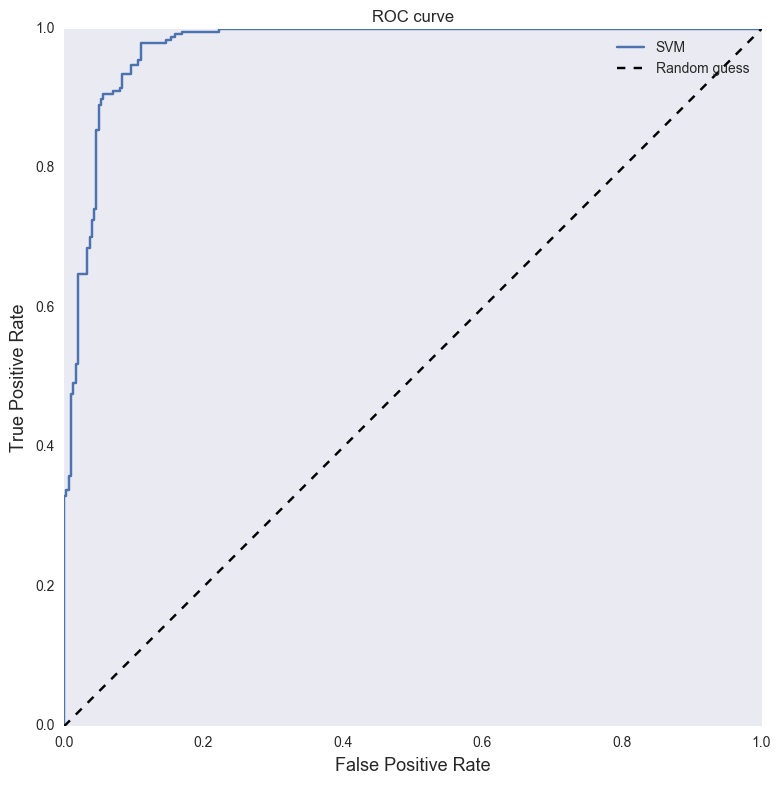

In [93]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='SVM')
plt.title('ROC curve', size=12)
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.plot((0, max(tpr)), 'k--', label='Random guess')
plt.grid()
plt.legend();

# Conclusion

Models - Accuracy 

KNN - 0.9981785063752276

Logistic Regression - 0.9726775956284153

Decision Tree Classifier - 0.98249761980323724

Random Forest Classifier - 0.9963570127504554

Gradient Boosting Classifier - 0.9908925318761385

Bernoulli NB - 0.844007193484

SVC - 0.93078324225865205

** We can see from above results, KNN works best for classification of real and fake bank notes **